In [213]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [214]:
image = cv2.imread('branch.jpg')

In [215]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

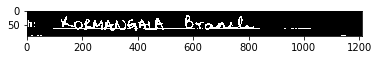

In [216]:
# thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
RET,thresh = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
img = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)
img = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
reverse = cv2.bitwise_not(img)
#img = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
cv2.imwrite('Out.jpg',reverse)
plt.imshow(reverse,cmap='gray')
plt.show()

In [217]:
# crop = reverse[:,reverse.sum(axis=0)>10]

In [225]:
reverse

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [243]:
maximum = max(reverse.sum(axis=1))
cropped = reverse[reverse.sum(axis=1)!=maximum,:]
temp = np.empty([cropped.shape[0],0])
threshold = 550
pixelSum = 255*100
images = []
for i in range(cropped.shape[1]):
    if cropped.sum(axis=0)[i]<threshold :
        if not temp.size:
            continue
        else :
            if temp.sum()> pixelSum :
                RET,temp = cv2.threshold(temp, 0,255, cv2.THRESH_BINARY_INV)
                # temp = cv2.bitwise_not(temp)
                print(temp.sum())
                images.append(temp)
            temp = np.empty([cropped.shape[0],0])
    else :
        temp=np.insert(temp,temp.shape[1],cropped[:,i],axis=1)

401115.0
1497615.0
1184475.0
637500.0
750720.0
611745.0
1676115.0
503880.0
589050.0
3480495.0


0.0


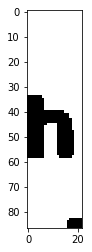

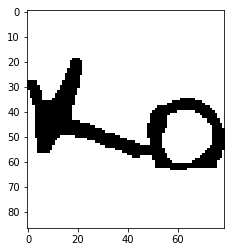

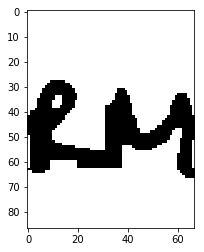

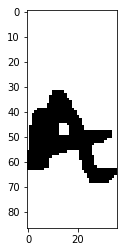

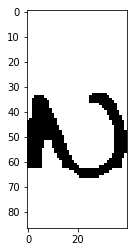

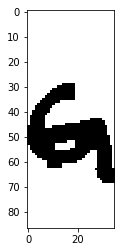

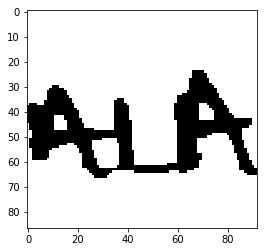

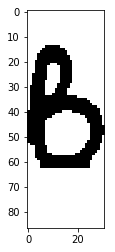

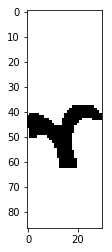

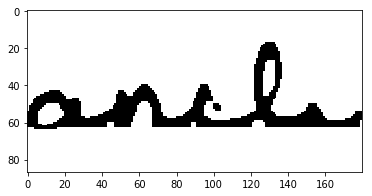

In [244]:
print(temp.sum())
for i in images:
    plt.imshow(i,cmap='gray')
    plt.show()

In [245]:
images

[array([[ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255., ...,    0.,    0.,    0.],
        [ 255.,  255.,  255., ...,    0.,    0.,    0.],
        [ 255.,  255.,  255., ...,    0.,    0.,    0.]]),
 array([[ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.]]),
 array([[ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255., 